In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn. linear_model import LogisticRegression

In [2]:
#데이터
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',10)
pd.set_option('display.max_rows',10)

diabetes_df = pd.read_csv(r'C:\Users\kis91\Desktop\python study\data\diabetes.csv')


print(diabetes_df.head(3))
print(diabetes_df.info())

x = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1]
print(y.value_counts())
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=156,stratify=y)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0          6        148         72             35            0  33.6      0.627                  50        1
1          1         85         66             29            0  26.6      0.351                  31        0
2          8        183         64              0            0  23.3      0.672                  32        1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memo

In [3]:
#Logistic regression

lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)
pred = lr_clf.predict(x_test)
prob = lr_clf.predict_proba(x_test)
fprs,tprs,threshold = roc_curve(y_test,prob[:,1])

#평가
print('confusion matrix : \n',confusion_matrix(y_test,pred))
print('accuracy :',np.round(accuracy_score(y_test,pred),4))
print('precision :',np.round(precision_score(y_test,pred),4))
print('recall :',np.round(recall_score(y_test,pred),4))
print('f1 :',np.round(f1_score(y_test,pred),4))
print('auc :',np.round(auc(fprs,tprs),4))
print('auc :',np.round(roc_auc_score(y_test,prob[:,1]),4))

confusion matrix : 
 [[87 13]
 [22 32]]
accuracy : 0.7727
precision : 0.7111
recall : 0.5926
f1 : 0.6465
auc : 0.8083
auc : 0.8083


C:\Users\kis91\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


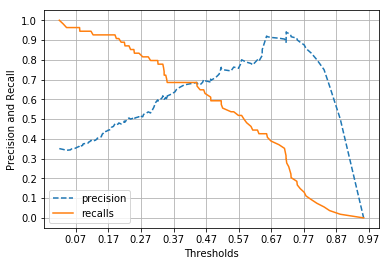

In [4]:
#precision - recall plot

precisions, recalls, thresholds = precision_recall_curve(y_test,prob[:,1])
threshold_boundary = thresholds.shape[0]
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')
plt.xticks(np.round(np.arange(0.07,1,0.1),2))
plt.yticks(np.round(np.arange(0,1.1,0.1),2))
plt.xlabel('Thresholds');plt.ylabel('Precision and Recall')
plt.grid()
plt.legend()
plt.show()

In [5]:
#임계값을 0.42로 바꾸기
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.42).fit(prob[:,1].reshape(-1,1))
new_pred = binarizer.transform(prob[:,1].reshape(-1,1))

#새로운 임계값으로 평가
print('confusion matrix : \n',confusion_matrix(y_test,new_pred))
print('accuracy :',np.round(accuracy_score(y_test,new_pred),4))
print('precision :',np.round(precision_score(y_test,new_pred),4))
print('recall :',np.round(recall_score(y_test,new_pred),4))
print('f1 :',np.round(f1_score(y_test,new_pred),4))
print('auc :',np.round(auc(fprs,tprs),4))
print('auc :',np.round(roc_auc_score(y_test,prob[:,1]),4))

confusion matrix : 
 [[83 17]
 [17 37]]
accuracy : 0.7792
precision : 0.6852
recall : 0.6852
f1 : 0.6852
auc : 0.8083
auc : 0.8083


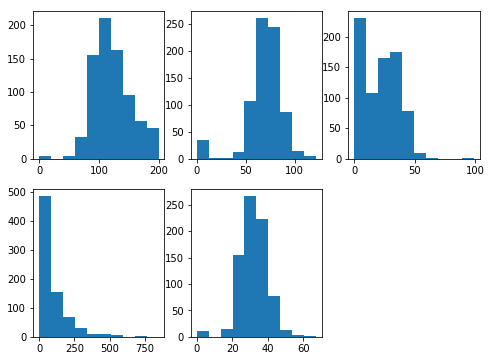

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] 
0인 건수 5 
0인 비율 0.651 

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] 
0인 건수 35 
0인 비율 4.557 

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] 
0인 건수 227 
0인 비율 29.557 

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] 
0인 건수 374 
0인 비율 48.698 

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] 
0인 건수 11 
0인 비율 1.432 

confusion matrix : 
 [[90 10]
 [21 33]]
accuracy : 0.7987
precision : 0.7674
recall : 0.6111
f1 : 0.6804
auc : 0.8059
auc : 0.8059

threshold : 0.3
accuracy : 0.7078 precision : 0.5616 recall : 0.7593 f1 : 0.6457

threshold : 0.32
accuracy : 0.7143 precision : 0.5735 recall : 0.7222 f1 : 0.6393

threshold : 0.34
accuracy : 0.7273 precision : 0.5968 recall : 0.6852 f1 : 0.6379

threshold : 0.36000000000000004
accuracy : 0.7273 precision : 0.6 recall : 0.6667 f1 : 0.6316

threshold : 0.38000000000000006
accuracy : 0.7403 precision : 0.625 recall : 

C:\Users\kis91\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kis91\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kis91\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
#성능이 좋지 않아 데이터 다시 탐색
plt.figure(figsize=(8,6))
plt.subplot(231)
plt.hist(diabetes_df['Glucose'],bins=10)
plt.subplot(232)
plt.hist(diabetes_df['BloodPressure'],bins=10)
plt.subplot(233)
plt.hist(diabetes_df['SkinThickness'],bins=10)
plt.subplot(234)
plt.hist(diabetes_df['Insulin'],bins=10)
plt.subplot(235)
plt.hist(diabetes_df['BMI'],bins=10)
plt.show()



features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in features:
    a = diabetes_df[i][diabetes_df[i]==0].count()
    b = diabetes_df[i].count()
    print(features,'\n0인 건수',a,'\n0인 비율',np.round(a/b*100,3),'\n')

#위의 피쳐들의 0값을 평균으로 대체
mean_zero_features = diabetes_df[features].mean()
diabetes_df[features] = diabetes_df[features].replace(0,mean_zero_features)

#data scalering
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=156,stratify=y)

#Logistic regression
lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)
pred = lr_clf.predict(x_test)
prob = lr_clf.predict_proba(x_test)
fprs,tprs,threshold = roc_curve(y_test,prob[:,1])

#평가
print('confusion matrix : \n',confusion_matrix(y_test,pred))
print('accuracy :',np.round(accuracy_score(y_test,pred),4))
print('precision :',np.round(precision_score(y_test,pred),4))
print('recall :',np.round(recall_score(y_test,pred),4))
print('f1 :',np.round(f1_score(y_test,pred),4))
print('auc :',np.round(auc(fprs,tprs),4))
print('auc :',np.round(roc_auc_score(y_test,prob[:,1]),4))

#평가함수
def eval_fun(y_test,pred):
    print('accuracy :',np.round(accuracy_score(y_test,pred),4),'precision :',np.round(precision_score(y_test,pred),4),
        'recall :',np.round(recall_score(y_test,pred),4),'f1 :',np.round(f1_score(y_test,pred),4), )


#새로운 임계값으로 평가
thr = np.arange(0.3,0.52,0.02)
for i in thr:
    print('\nthreshold :',i)
    binarizer = Binarizer(threshold=i).fit(prob[:,1].reshape(-1,1))
    new_pred = binarizer.transform(prob[:,1].reshape(-1,1))
    eval_fun(y_test,new_pred)
